# Práctica 2
**Procesamiento de Lenguaje Natural**   
**Facultad de Ingenierıa,UNAM**  
**Flores García Karina**  
Objetivo: A partir del corpus seleccionado en la tarea anterior realizar un modelo del lenguaje neuronal con base en la arquitectura propuesta por Bengio (2003). El corpus ya debe estar preprocesado. 

In [158]:
#Importa bibliotecas necesarias para la red neuronal y la arquitectura de Bengio
import nltk
import re
import string
import numpy as np
#NLTK para obtener el corpus
from nltk.corpus import brown
from tqdm import tqdm
from wordcloud import WordCloud #Paquetería para visualizar palabras
import matplotlib.pyplot as plt
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import sent_tokenize
from collections import defaultdict, Counter
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from operator import itemgetter
from sklearn.model_selection import train_test_split

#### Descarga de corpus en inglés y pre procesamiento

In [2]:
nltk.download('brown')

[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\karin\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!


True

In [215]:
#Obtenemos el corpus como un texto
corpus = ' '.join(brown.words())
corpus = corpus[:10000]
corpus = corpus.lower()
print(corpus)

the fulton county grand jury said friday an investigation of atlanta's recent primary election produced `` no evidence '' that any irregularities took place . the jury further said in term-end presentments that the city executive committee , which had over-all charge of the election , `` deserves the praise and thanks of the city of atlanta '' for the manner in which the election was conducted . the september-october term jury had been charged by fulton superior court judge durwood pye to investigate reports of possible `` irregularities '' in the hard-fought primary which was won by mayor-nominate ivan allen jr. . `` only a relative handful of such reports was received '' , the jury said , `` considering the widespread interest in the election , the number of voters and the size of this city '' . the jury said it did find that many of georgia's registration and election laws `` are outmoded or inadequate and often ambiguous '' . it recommended that fulton legislators act `` to have th

In [216]:
#División del corpus en oraciones para el análisis
sentences = sent_tokenize(corpus)
print(sentences)

["the fulton county grand jury said friday an investigation of atlanta's recent primary election produced `` no evidence '' that any irregularities took place .", "the jury further said in term-end presentments that the city executive committee , which had over-all charge of the election , `` deserves the praise and thanks of the city of atlanta '' for the manner in which the election was conducted .", "the september-october term jury had been charged by fulton superior court judge durwood pye to investigate reports of possible `` irregularities '' in the hard-fought primary which was won by mayor-nominate ivan allen jr. .", "`` only a relative handful of such reports was received '' , the jury said , `` considering the widespread interest in the election , the number of voters and the size of this city '' .", "the jury said it did find that many of georgia's registration and election laws `` are outmoded or inadequate and often ambiguous '' .", "it recommended that fulton legislators 

#### Limpieza de signos de puntuación, de interrogación, admiración y elementos no léxicos

In [217]:
#Expresión regular para limpieza de signos
exp_reg_signal = re.compile('[%s]' % re.escape(string.punctuation))
clean_signal = [exp_reg_signal.sub('', w) for w in sentences]
#Expresión regular para limpieza de numeros
exp_reg_num = re.compile('[0-9]+')
clean_num = [exp_reg_num.sub('', w) for w in clean_signal]
#Limpieza de espacios en blanco al final e inicio de la cadena
exp_reg_space = re.compile('^\s+|\s+$')
clean_space = [exp_reg_space.sub('', w) for w in clean_num]
#Limpieza de espacios duplicados en las cadenas
exp_reg_spaces = re.compile(r'\s{2,}?')
clean_spaces = [exp_reg_spaces.sub('', w) for w in clean_space]
clean_corpus = clean_spaces
print(clean_corpus)


['the fulton county grand jury said friday an investigation of atlantas recent primary election producedno evidencethat any irregularities took place', 'the jury further said in termend presentments that the city executive committeewhich had overall charge of the election deserves the praise and thanks of the city of atlantafor the manner in which the election was conducted', 'the septemberoctober term jury had been charged by fulton superior court judge durwood pye to investigate reports of possibleirregularitiesin the hardfought primary which was won by mayornominate ivan allen jr', 'only a relative handful of such reports was received the jury said considering the widespread interest in the electionthe number of voters and the size of this city', 'the jury said it did find that many of georgias registration and election lawsare outmoded or inadequate and often ambiguous', 'it recommended that fulton legislators actto have these laws studied and revised to the end of modernizing and 

#### Limpieza de stopwords

In [218]:
#Descarga de lista de stopwords
nltk.download('stopwords')

#Obtención de stopwords para inglés
stopwords_list = stopwords.words('english')

#Función para remover stopwords
def remove_stopwords(clean_corpus):
    return [w for w in clean_corpus if w not in stopwords_list]

#Corpus sin stopwords
corpus_no_stopwords = remove_stopwords(clean_corpus)
print(corpus_no_stopwords[:500])

['the fulton county grand jury said friday an investigation of atlantas recent primary election producedno evidencethat any irregularities took place', 'the jury further said in termend presentments that the city executive committeewhich had overall charge of the election deserves the praise and thanks of the city of atlantafor the manner in which the election was conducted', 'the septemberoctober term jury had been charged by fulton superior court judge durwood pye to investigate reports of possibleirregularitiesin the hardfought primary which was won by mayornominate ivan allen jr', 'only a relative handful of such reports was received the jury said considering the widespread interest in the electionthe number of voters and the size of this city', 'the jury said it did find that many of georgias registration and election lawsare outmoded or inadequate and often ambiguous', 'it recommended that fulton legislators actto have these laws studied and revised to the end of modernizing and 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\karin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### División de enunciados en palabras

In [219]:
corpus_words = []

for w in corpus_no_stopwords:
    corpus_words.append(w.split())

print(corpus_words)

[['the', 'fulton', 'county', 'grand', 'jury', 'said', 'friday', 'an', 'investigation', 'of', 'atlantas', 'recent', 'primary', 'election', 'producedno', 'evidencethat', 'any', 'irregularities', 'took', 'place'], ['the', 'jury', 'further', 'said', 'in', 'termend', 'presentments', 'that', 'the', 'city', 'executive', 'committeewhich', 'had', 'overall', 'charge', 'of', 'the', 'election', 'deserves', 'the', 'praise', 'and', 'thanks', 'of', 'the', 'city', 'of', 'atlantafor', 'the', 'manner', 'in', 'which', 'the', 'election', 'was', 'conducted'], ['the', 'septemberoctober', 'term', 'jury', 'had', 'been', 'charged', 'by', 'fulton', 'superior', 'court', 'judge', 'durwood', 'pye', 'to', 'investigate', 'reports', 'of', 'possibleirregularitiesin', 'the', 'hardfought', 'primary', 'which', 'was', 'won', 'by', 'mayornominate', 'ivan', 'allen', 'jr'], ['only', 'a', 'relative', 'handful', 'of', 'such', 'reports', 'was', 'received', 'the', 'jury', 'said', 'considering', 'the', 'widespread', 'interest', '

#### Definimos tres funciones:
- Función para crear el vocabulario: asocia índices numéricos a palabras
- Función para asociar a cada elemento, una palabra
- Función para visualizar los embeddings por reducción de dimensionalidad con PCA

In [220]:
#Funcion que crea un vocabulario de palabras con un indice numerico
def vocab():
    vocab = defaultdict()
    vocab.default_factory = lambda: len(vocab)
    return vocab    

#Funcion que pasa la cadena de simbolos a una secuencia con indices numericos
def text2numba(corpus, vocab):
    for doc in corpus:
        yield [vocab[w] for w in doc]

#Función para visualizar los embeddings
#Usa reducción de la dimensionalidad por PCA
def plot_words(Z,ids):
    Z = PCA(2).fit_transform(Z)
    r=0
    plt.scatter(Z[:,0],Z[:,1], marker='o', c='blue')
    for label,x,y in zip(ids, Z[:,0], Z[:,1]):
        plt.annotate(label, xy=(x,y), xytext=(-1,1), textcoords='offset points', ha='center', va='bottom')
        r+=1
    plt.show()

##### Separación en corpus de entrenamiento y evaluación con ayuda de Sklearn

In [221]:
from sklearn.model_selection import train_test_split
corpus_train, corpus_evaluation = train_test_split(corpus_words, test_size=0.3)
print('Número de oraciones en corpus de entrenamiento:',len(corpus_train))
print('Número de oraciones en corpus de evaluación:',len(corpus_evaluation))

Número de oraciones en corpus de entrenamiento: 49
Número de oraciones en corpus de evaluación: 22


#### Numero de tipos y tokens en el corpus

In [222]:
#Frecuencia de los tipos
freq_words= Counter( chain(*[' '.join(sent).lower().split() for sent in corpus_train]) )

print('Número de tipos: {} \nNúmero de tokens: {}'.format(len(freq_words), sum(freq_words.values())))

Número de tipos: 518 
Número de tokens: 1013


#### Sustitución de los hapax

Sustitución de elementos del texto por el símbolo de fuera del vocabulario (Out Of Vocabulary) u $OOV$ esto nos permitirá manejar elementos que no se observen durante el entrenamiento.

In [223]:
#Nuevo corpus remplazando hápax por OOV
corpus_hapax = []
#Reemplazamos los hápax por OOV
for sent in corpus_train:
  sent_hapax =[]
  for w in sent:
    #Si es hápax
    if freq_words[w.lower()] == 1:
      #Se reemplaza por <oov>
      sent_hapax.append('<oov>')
    else:
      #De otra forma se mantiene la palabra en mínuscula
      sent_hapax.append(w.lower())
  #Se agrupan las cadenas    
  corpus_hapax.append(sent_hapax)
print(len(corpus_hapax))

49


#### Creación del vocabulario e indexación
Bengio propone asociar cada palabra en el vocabulario con un vector distribuido en R.

In [241]:
#Se crea el vocabulario y se asigna un indice a los simbolos de acuerdo a su aparición
voc = vocab()
cads_idx = list(text2numba(corpus_hapax,voc))
#Se crean las etiquetas de inicio y fin de cadena para ser agregadas al vocabulario
EOS = '<EOS>'
BOS = '<BOS>'

#Se indexan las etiquetas creadas para inicio y fin de cadena
BOS_IDX = max(voc.values())+2
EOS_IDX = max(voc.values())+1

#Se agregan las etiquetas previamente creadas, al vocabulario
voc[EOS] = EOS_IDX
voc[BOS] = BOS_IDX

#A cada cadena se le agrega la etiqueta BOS al inicio y EOS al final
cadenas = [[BOS_IDX] + cad + [EOS_IDX] for cad in cads_idx]

#Para visualizar la indexación del vocabulario
#print(len(cads_idx))
#Para visualizar las cadenas con las etiquetas BOS, EOS y los indices
#print(cadenas[:10])
print(voc)

defaultdict(<function vocab.<locals>.<lambda> at 0x00000281CF442160>, {'it': 0, '<oov>': 1, 'that': 2, 'the': 3, 'enabling': 4, 'funds': 5, 'and': 6, 'an': 7, 'implementation': 8, 'of': 9, 'law': 10, 'be': 11, 'these': 12, 'should': 13, 'to': 14, 'in': 15, 'wards': 16, 'from': 17, 'its': 18, 'elected': 19, 'jury': 20, 'said': 21, 'this': 22, 'is': 23, 'one': 24, 'fulton': 25, 'county': 26, 'general': 27, 'program': 28, 'state': 29, 'welfare': 30, 'through': 31, 'counties': 32, 'with': 33, 'exception': 34, 'money': 35, 'georgias': 36, 'election': 37, 'or': 38, 'listed': 39, 'his': 40, 'age': 41, 'place': 42, 'as': 43, 'highway': 44, 'department': 45, 'tuesday': 46, 'work': 47, 'for': 48, 'gov': 49, 'a': 50, 'revolving': 51, 'fund': 52, 'make': 53, 'rural': 54, 'roads': 55, 'under': 56, 'which': 57, 'new': 58, 'bonds': 59, 'would': 60, 'are': 61, 'by': 62, 'petition': 63, 'charged': 64, 'vandiver': 65, 'expected': 66, 'they': 67, 'adjournment': 68, 'have': 69, 'griffin': 70, 'held': 71, 

#### Creación de bigramas
Para obtener los pares de entrenamiento es necesaria la creación de bigramas

In [225]:
#Se crean los bigramas
bigrams = list(chain(*[zip(cad,cad[1:]) for cad in cadenas]))
bigrams = list(chain(*[zip(cad,cad[1:]) for cad in cadenas]))
print("Cantidad de bigramas construidos: {}".format(len(bigrams)))
print(bigrams[:15])



Cantidad de bigramas construidos: 1062
[(129, 0), (0, 1), (1, 2), (2, 3), (3, 1), (1, 1), (1, 4), (4, 5), (5, 6), (6, 1), (1, 3), (3, 1), (1, 1), (1, 1), (1, 2)]


#### Entrenamiento de la red neuronal con los bigramas

In [229]:
np.random.seed(0)
#Parámetros determinados para el entrenamiento del modelo
iterations_model = 50
eta = 0.1
N = len(voc)
print(N)
length_range = 1.0 #rango de aprendizaje
lineal = 100 #capa lineal
tanh = 300 #capa con tanh

# Preparación del modelo neuronal
#Para la capa de embeding
C = np.random.randn(lineal,N) / np.sqrt(N)
#Para la capa hiperbolica
W = np.random.randn(tanh,lineal) / np.sqrt(tanh)
b = np.ones(tanh)
#Para la capa de salida
U = np.random.randn(N,tanh) / np.sqrt(tanh)
c = np.ones(N)


for i in tqdm(range(0,iterations_model)):    
    for bg in bigrams:
    # Arquitectura Forward       
        #Capa de embbeding
        embeddingLayer = C.T[bg[0]]
        #Cpa oculta y pre activación
        hiddenLayer= np.tanh(np.dot(W,embeddingLayer) + b)
        pre_hiddenLayer = np.dot(U,hiddenLayer) + c
        #Salida - se resta el max para evitar errores
        outLayer = np.exp(pre_hiddenLayer - np.max(pre_hiddenLayer))
        #Softmax
        f = outLayer/outLayer.sum(0)
        
    #Backpropagation
    #Las variables de backpropagation
        #Capa de salida
        d_out = f
        d_out[bg[1]] -= 1
        #Capa oculta
        d_h = (1-hiddenLayer**2)*np.dot(U.T,d_out) 
        #Capa embedding
        d_c = np.dot(W.T,d_h)
        c -= eta*d_out
        
    #Gradiente descendiente
    #Actualizaciones de los pesos a partir de las variables
        #Capa de salida
        U -= eta*np.outer(d_out,hiddenLayer)
        #Capa oculta
        W -= eta*np.outer(d_h,embeddingLayer)
        b -=eta*d_h
        #Capa de embedding
        C.T[bg[0]] -= eta*d_c


130


100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:17<00:00,  2.82it/s]


#### Evaluación del modelo

In [238]:
#Función para simular big_model.forward al momento de evaluar el modelo
def forward(x):
    #Capa de embbeding
    embeddingLayer = C.T[x]
    #Cpa oculta y pre activación
    hiddenLayer= np.tanh(np.dot(W,embeddingLayer) + b)
    pre_hiddenLayer = np.dot(U,hiddenLayer) + c
    #Salida - se resta el max para evitar errores
    outLayer = np.exp(pre_hiddenLayer - np.max(pre_hiddenLayer))
    #Softmax
    f = outLayer/outLayer.sum(0)

    return f

In [243]:
list_words_prob = []
for word in voc.keys():
    list_words_prob.append((word,forward(voc['enabling'])[voc[word]]))
list_words_prob.sort(key=lambda x: x[1],reverse=True)

list_words_prob[:10]

[('<oov>', 0.8380070036515911),
 ('funds', 0.07559286011034255),
 ('the', 0.01784464051056949),
 ('a', 0.013787633471986777),
 ('<EOS>', 0.005109374809858656),
 ('one', 0.003866485677226673),
 ('in', 0.003278098367754479),
 ('its', 0.0029715407027979574),
 ('these', 0.002373462709376071),
 ('be', 0.0021672067727973583)]

In [264]:
def prob_sent(sent):
    #Obtenemos los simbolos
    seq = sent.split()
    #Obtenemos los bigramas de la cadena de evaluacion
    bigrSeq = zip(seq,seq[1:])
    
    #Guardamos la probabilidad inicial dado el modelo
    try:
        p = forward(voc['<BOS>'])[voc[seq[0]]]
    except: 
        p = forward(voc['<BOS>'])[voc['<oov>']]
    #Multiplicamos por las probabilidades de los bigramas dado el modelo
    for gram1, gram2 in bigrSeq:
        #Obtiene las probabilidades de transición
        #Dado el primer elemento
        try:
            prev_prob = forward(voc[gram1])
        #En caso de que sea una OOV
        except:
            prev_prob = forward(voc['<oov>'])
        #Obtiene la probabilidad de transitar a la siguiente palabra
        try:
            p *= prev_prob[voc[gram2]]
        #En caso de que sea una OOV
        except:
            p *= prev_prob[voc['<oov>']]
            
    return p

In [265]:
prob_sent('that the enabling funds')

6.679846045555202e-08

In [266]:
#Evaluación del modelo
H = 0.0
for cad in corpus_evaluation:
    #Probabilidad de la cadena
    p_cad = prob_sent(' '.join(cad))
    #Longitud de la cadena
    M = len(cad)
    #Obtenemos la entropía cruzada de la cadena
    if p_cad == 0:
        pass
    else:
        H -= (1./M)*(np.log(p_cad)/np.log(2))
        
H = H/len(corpus_evaluation)

print('Entropía promedio: {}\nPerplejidad total: {}'.format(H,2**H))

Entropía promedio: 4.51683768598422
Perplejidad total: 22.89304853575862


#### Probabilidad de 5 oraciones no vistas en el entrenamiento.

In [271]:
sentences = ['audience has not been issue','departments of all the counties','candidate for governor would','highway reconstruction bonds','the couple was married']
print('Las frases:')
for sentence in sentences:
    print("- '{}' tiene una probabilidad de {}".format(sentence,prob_sent(sentence)))

Las frases:
- 'audience has not been issue' tiene una probabilidad de 5.883156422070147e-12
- 'departments of all the counties' tiene una probabilidad de 1.2260954073300807e-06
- 'candidate for governor would' tiene una probabilidad de 1.0665105458231103e-07
- 'highway reconstruction bonds' tiene una probabilidad de 4.959907208600928e-07
- 'the couple was married' tiene una probabilidad de 4.939307632113679e-05


#### Guardar los vectores de la capa de embedding asociados a las palabras

In [282]:
#Los vectores de la capa de embedding se encuentran en 'C'
dic_embedding = {}
for element in C:
    for w in element:
        for i in range(0,len(element)):
            dic_embedding[i] = w
#print(dic_embedding)

#### Nube de palabras del corpus que se encuentran dentro de las probabilidades

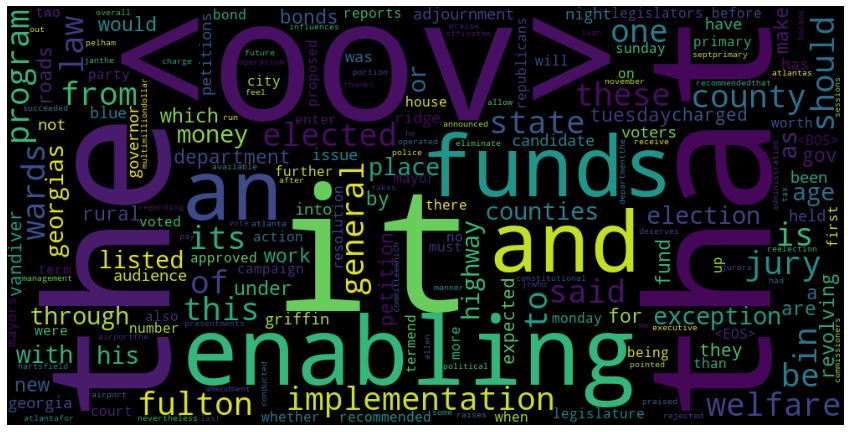

In [287]:
lista= []
for w in sorted(voc.items(), key=itemgetter(1)):
    lista.append(w[0])

#Generación de nube con algunas palabras del corpus
Word_could_dict=Counter(lista)
wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(Word_could_dict)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

#plt.close()